# Coin in Square

- In a common carnival game a player tosses a penny from a distance of about 5 feet onto the surface of a table ruled in 1-inch squares
- If the penny (3/4 inch in diameter) falls entirely inside a square, the player receives 5 cents but does not get his penny back
    - Otherwise, he loses the penny

- *If the penny lands on the table, what is his chance to win?*

_____

- We need to think about the area of the square and split it into two zones
    - **Win Zone**: if the center of the penny lands in this zone, he wins a nickel
    - **Lose Zone**: if the center of the penny lands in this zone, he loses
    
- Then, we just need to compare the area of the Win Zone to the total area to get the chance of winning

- Since the diameter of the penny is 3/4 inches, the radius is 3/8 inches
    - This means that if the center of the penny lands any closer than 3/8 inches from any edge, he loses
        - We'll create a plot to show this

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

In [3]:
x_box = [0, 1]
x_coin = [3/8, 1-3/8]
y_box = [1,1]
y_coin_upper = [1-3/8, 1-3/8]
y_coin_lower = [3/8, 3/8]

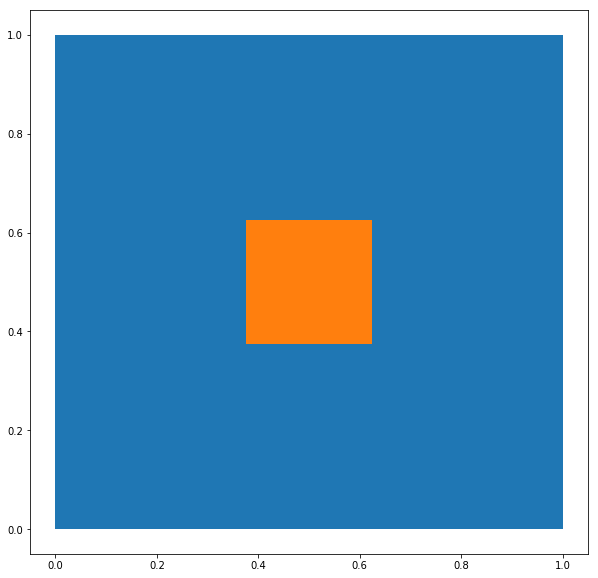

In [4]:
plt.fill_between(x_box, y_box, [0,0])
plt.fill_between(x_coin, y_coin_upper, y_coin_lower)
plt.show()

- As we can see, this area is really small

$$
(\text{Total Area}) = 1\cdot1 = 1 \\
(\text{Orange Area}) = ((1-3/8) - 3/8)\cdot((1-3/8) - 3/8) = 1/16
$$

- Therefore, the probability of winning is (1/16)/1 = 1/16

___

- We can simulate a bunch of coin flips to confirm our result

In [5]:
x, y = np.random.random(size=2)

In [6]:
x, y

(0.9259874755742901, 0.3823939188852502)

In [7]:
def sim():
    x, y = np.random.random(size=2)
    y_upper_edge = y + 3/8
    y_lower_edge = y - 3/8
    x_left_edge = x - 3/8
    x_right_edge = x + 3/8
    
    if (y_upper_edge > 1) or (y_lower_edge < 0) or (x_left_edge < 0) or (x_right_edge > 1):
        return 0
    else:
        return 1

In [8]:
n_trials = 1000000
total = 0

for trial in range(n_trials):
    total += sim()
    
print(total/n_trials)

0.062337


In [9]:
1/16

0.0625

- Eyyy